In [26]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

In [68]:
import imageio, numpy as np, os, sys

def save_img(out_path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    imageio.imsave(out_path, img)

def get_img(src, img_size=False):
    img= imageio.imread(src, pilmode='RGB') # misc.imresize(, (256, 256, 3))
    if not (len(img.shape) == 3 and img.shape[2] == 3):
        img = np.dstack((img,img,img))
    if img_size != False:
        img = imageio.imresize(img, img_size)
    return img

def show(img):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    
def show2(img1, img2):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.imshow(img1)
    
    plt.subplot(1,2,2)
    plt.imshow(img2)

In [48]:
%ls examples/style

la_muse.jpg                        the_shipwreck_of_the_minotaur.jpg
rain_princess.jpg                  udnie.jpg
the_scream.jpg                     wave.jpg


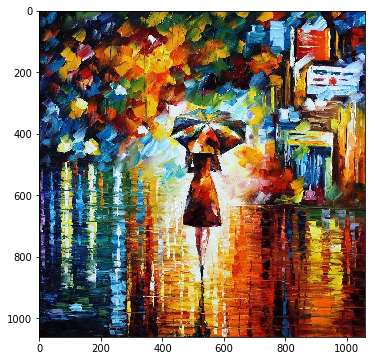

In [49]:
img = get_img('examples/style/rain_princess.jpg')
img = Image.fromarray(img)
show(img)

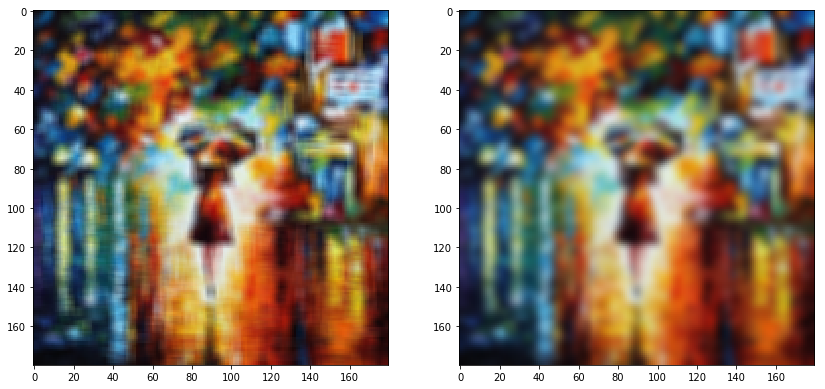

In [120]:
img2 = img.resize((180,180))
img2_boxblur = img2.filter(ImageFilter.BoxBlur(2))
show2(img2_boxblur, img2.filter(ImageFilter.GaussianBlur(2)))

# How do we go about learning textures?

In [108]:
from sklearn.feature_extraction import image as ImgExtractor

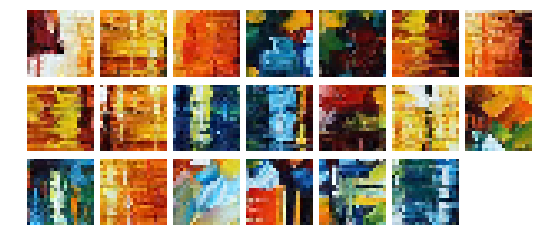

In [132]:
"""Extracts small (20x20) image patches from a given image

Setting the random state allows us to see the same patch locations from different images
"""
def genPatches(image, random_state_fixed=False):
    if random_state_fixed:
        t = ImgExtractor.extract_patches_2d(np.array(image), (20,20), max_patches=20, random_state=3)
    else:
        t = ImgExtractor.extract_patches_2d(np.array(image), (20,20), max_patches=20)
    return t

"""Plots image patches on a grid
"""
def plotPatches(t, rows=7, cols=3):
    rows, cols = 7,3
    fig, axes = plt.subplots(cols, rows, figsize=(rows,cols))
    
    for i in range(cols):
        for j in range(rows):
            axes[i][j].axis('off')
            
            index = rows*i + j
            if index < t.shape[0]:
                patch = t[rows*i + j]
                axes[i][j].imshow(patch)

    plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                    wspace=0.1, hspace=0.1)
    plt.show()

t = genPatches(img2, True)
plotPatches(t)

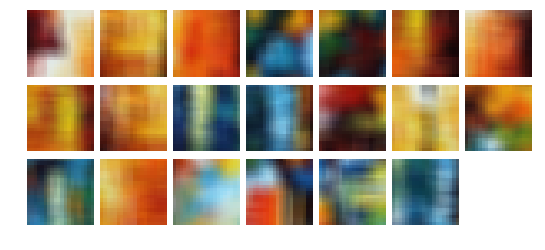

In [131]:
t = genPatches(img2_boxblur, True)
plotPatches(t)

Downsizing and blurring the image leaves us with these low-quality patches, which could ostensibly be used to reconstruct the original image?
- **superresolution**